## Load Needed Libraries

In [314]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn


from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

import xgboost
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor



import joblib

## Load Data

In [2]:
AudiData=pd.read_csv("audi.csv")

In [3]:
AudiData.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [4]:
AudiData.model.unique()

array([' A1', ' A6', ' A4', ' A3', ' Q3', ' Q5', ' A5', ' S4', ' Q2',
       ' A7', ' TT', ' Q7', ' RS6', ' RS3', ' A8', ' Q8', ' RS4', ' RS5',
       ' R8', ' SQ5', ' S8', ' SQ7', ' S3', ' S5', ' A2', ' RS7'],
      dtype=object)

In [5]:
AudiData.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [6]:
AudiData.corr()["price"].sort_values()

mpg          -0.600334
mileage      -0.535357
tax           0.356157
engineSize    0.591262
year          0.592581
price         1.000000
Name: price, dtype: float64

## Distribution Graph Due TAudiDataAudiDatao Price

C:\Users\ercan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

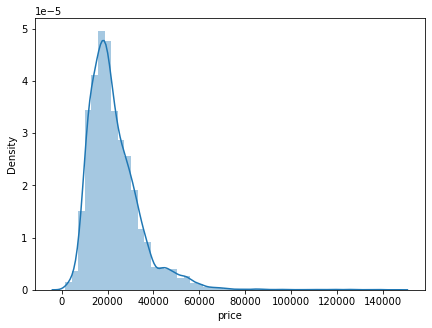

In [7]:
plt.figure(figsize=(7,5))
sbn.distplot(AudiData["price"])

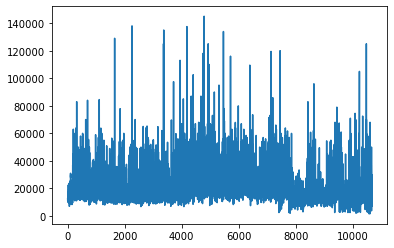

In [8]:
plt.plot([x for x in range(len(AudiData))],AudiData["price"])

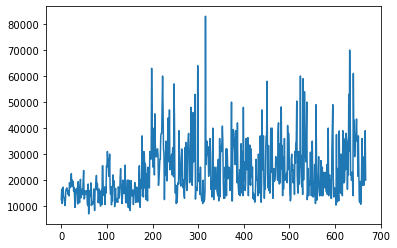

In [9]:
plt.plot([x for x in range(len(AudiData)-10000)],AudiData["price"].iloc[:668])

In [10]:
# the reason of selecting the data after the 105th index is explained above
y=AudiData.sort_values("price",ascending=False).iloc[105:]

C:\Users\ercan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

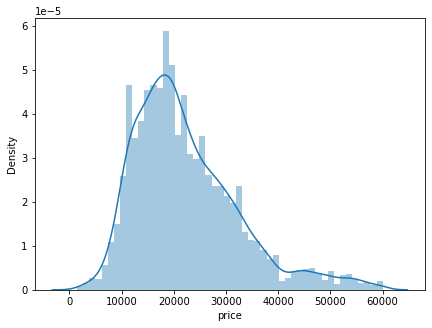

In [11]:
plt.figure(figsize=(7,5))
sbn.distplot(y["price"])

In [12]:
AudiData.groupby("year").mean()["price"]

year
1997     4650.000000
1998     4999.000000
2002     2433.000000
2003     3408.333333
2004     5053.600000
2005     3490.714286
2006     6499.111111
2007     7325.250000
2008     6281.428571
2009     6281.956522
2010     7224.093750
2011     8944.808511
2012     9860.811765
2013    11690.790378
2014    13890.659955
2015    15128.235235
2016    16908.725051
2017    19951.624289
2018    26296.707176
2019    30410.752268
2020    35967.067039
Name: price, dtype: float64

In [13]:
AudiData=y

## Encoding Processes

In [14]:
onehotencoder = preprocessing.OneHotEncoder()

In [15]:
AudiData['transmission'] = pd.Categorical(AudiData['transmission'])
dfDummies = pd.get_dummies(AudiData['transmission'], prefix = 'Trans')
dfDummies

,Trans_Automatic,Trans_Manual,Trans_Semi-Auto
524,0,0,1
7221,0,0,1
222,1,0,0
5129,1,0,0
4100,1,0,0
...,...,...,...
7404,0,1,0
10108,0,1,0
7795,0,1,0
10552,0,1,0


In [16]:
AudiData=pd.concat([AudiData, dfDummies], axis=1)

In [17]:
AudiData=AudiData.drop("transmission",axis=1)
AudiData.head()

,model,year,price,mileage,fuelType,tax,mpg,engineSize,Trans_Automatic,Trans_Manual,Trans_Semi-Auto
524,RS5,2019,59995,5089,Petrol,145,30.1,2.9,0,0,1
7221,A5,2020,59995,2000,Diesel,150,40.9,3.0,0,0,1
222,Q7,2019,59995,10,Diesel,145,33.2,3.0,1,0,0
5129,Q7,2019,59990,3988,Diesel,145,32.8,3.0,1,0,0
4100,RS4,2019,59990,5121,Petrol,145,29.1,2.9,1,0,0


In [18]:
onehotencoder2 = preprocessing.OneHotEncoder()

In [19]:
AudiData['fuelType'] = pd.Categorical(AudiData['fuelType'])
dfDummies2 = pd.get_dummies(AudiData['fuelType'], prefix = 'Ftype')
dfDummies2

,Ftype_Diesel,Ftype_Hybrid,Ftype_Petrol
524,0,0,1
7221,1,0,0
222,1,0,0
5129,1,0,0
4100,0,0,1
...,...,...,...
7404,1,0,0
10108,0,0,1
7795,0,0,1
10552,1,0,0


In [20]:
AudiData=pd.concat([AudiData, dfDummies2], axis=1)

In [21]:
AudiData=AudiData.drop("fuelType",axis=1)

In [22]:
AudiData.head()

,model,year,price,mileage,tax,mpg,engineSize,Trans_Automatic,Trans_Manual,Trans_Semi-Auto,Ftype_Diesel,Ftype_Hybrid,Ftype_Petrol
524,RS5,2019,59995,5089,145,30.1,2.9,0,0,1,0,0,1
7221,A5,2020,59995,2000,150,40.9,3.0,0,0,1,1,0,0
222,Q7,2019,59995,10,145,33.2,3.0,1,0,0,1,0,0
5129,Q7,2019,59990,3988,145,32.8,3.0,1,0,0,1,0,0
4100,RS4,2019,59990,5121,145,29.1,2.9,1,0,0,0,0,1


In [23]:
onehotencoder3 = preprocessing.OneHotEncoder()

In [24]:
AudiData['model'] = pd.Categorical(AudiData['model'])
dfDummies3 = pd.get_dummies(AudiData['model'], prefix = 'model')
dfDummies3

,model_ A1,model_ A2,model_ A3,model_ A4,model_ A5,model_ A6,model_ A7,model_ A8,model_ Q2,model_ Q3,...,model_ RS5,model_ RS6,model_ RS7,model_ S3,model_ S4,model_ S5,model_ S8,model_ SQ5,model_ SQ7,model_ TT
524,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7221,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
222,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5129,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7404,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10108,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7795,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10552,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
AudiData=pd.concat([AudiData, dfDummies3], axis=1)

In [26]:
AudiData

,model,year,price,mileage,tax,mpg,engineSize,Trans_Automatic,Trans_Manual,Trans_Semi-Auto,...,model_ RS5,model_ RS6,model_ RS7,model_ S3,model_ S4,model_ S5,model_ S8,model_ SQ5,model_ SQ7,model_ TT
524,RS5,2019,59995,5089,145,30.1,2.9,0,0,1,...,1,0,0,0,0,0,0,0,0,0
7221,A5,2020,59995,2000,150,40.9,3.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
222,Q7,2019,59995,10,145,33.2,3.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5129,Q7,2019,59990,3988,145,32.8,3.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4100,RS4,2019,59990,5121,145,29.1,2.9,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7404,A3,2009,2490,152034,150,55.4,1.9,0,1,0,...,0,0,0,0,0,0,0,0,0,0
10108,TT,2002,1990,131925,325,30.1,1.8,0,1,0,...,0,0,0,0,0,0,0,0,0,1
7795,A3,2005,1975,104000,240,38.1,2.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
10552,A4,2004,1699,110000,315,36.2,2.5,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
AudiData=AudiData.drop("model",axis=1)

In [28]:
AudiData

,year,price,mileage,tax,mpg,engineSize,Trans_Automatic,Trans_Manual,Trans_Semi-Auto,Ftype_Diesel,...,model_ RS5,model_ RS6,model_ RS7,model_ S3,model_ S4,model_ S5,model_ S8,model_ SQ5,model_ SQ7,model_ TT
524,2019,59995,5089,145,30.1,2.9,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
7221,2020,59995,2000,150,40.9,3.0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
222,2019,59995,10,145,33.2,3.0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5129,2019,59990,3988,145,32.8,3.0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4100,2019,59990,5121,145,29.1,2.9,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7404,2009,2490,152034,150,55.4,1.9,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
10108,2002,1990,131925,325,30.1,1.8,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
7795,2005,1975,104000,240,38.1,2.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
10552,2004,1699,110000,315,36.2,2.5,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


## Prepare the data to create model

In [29]:
y=AudiData["price"].values
x=AudiData.drop("price",axis=1).values

In [30]:
y

array([59995, 59995, 59995, ...,  1975,  1699,  1490], dtype=int64)

In [31]:
x

array([[2.019e+03, 5.089e+03, 1.450e+02, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.020e+03, 2.000e+03, 1.500e+02, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.019e+03, 1.000e+01, 1.450e+02, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [2.005e+03, 1.040e+05, 2.400e+02, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.004e+03, 1.100e+05, 3.150e+02, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.003e+03, 1.010e+05, 2.400e+02, ..., 0.000e+00, 0.000e+00,
        0.000e+00]])

## Scaling process

In [32]:
scaler=MinMaxScaler()
x_scaled =scaler.fit_transform(x)

In [269]:
x_train, x_test, y_train, y_test= train_test_split(x_scaled,y,test_size=0.1,random_state=40)

# KERAS

In [270]:
model=Sequential()
            
model.add(Dense(64,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(1))

model.compile(optimizer="Adam",loss="mse")

history = model.fit(x=x_train,y=y_train,validation_split=0.10,batch_size= 16,epochs= 75)

Epoch 1/75
535/535 [==============================] - 1s 1ms/step - loss: 148751008.0000 - val_loss: 38206376.0000
Epoch 2/75
535/535 [==============================] - 0s 906us/step - loss: 27821344.0000 - val_loss: 17463292.0000
Epoch 3/75
535/535 [==============================] - 0s 901us/step - loss: 13897633.0000 - val_loss: 11572078.0000
Epoch 4/75
535/535 [==============================] - 0s 926us/step - loss: 10733073.0000 - val_loss: 10921853.0000
Epoch 5/75
535/535 [==============================] - 0s 913us/step - loss: 9601054.0000 - val_loss: 9894107.0000
Epoch 6/75
535/535 [==============================] - 0s 907us/step - loss: 9068349.0000 - val_loss: 8960738.0000
Epoch 7/75
535/535 [==============================] - 0s 919us/step - loss: 8701174.0000 - val_loss: 9082135.0000
Epoch 8/75
535/535 [==============================] - 1s 1ms/step - loss: 8225410.5000 - val_loss: 8717084.0000
Epoch 9/75
535/535 [==============================] - 0s 913us/step - loss: 8064195

In [271]:
tahmindizisi=model.predict(x_test)

34/34 [==============================] - 0s 630us/step


In [272]:
mae = mean_absolute_error(y_test,tahmindizisi)
print("MAE: {}".format(int(mae)))
mse = mean_squared_error(y_test,tahmindizisi)
print("MSE: {}".format(int(mse)))
mape = 100*mean_absolute_percentage_error(y_test,tahmindizisi)
print("MAPE: {}".format(mape))

MAE: 1641
MSE: 5058440
MAPE: 7.891198956644899


In [273]:
predicts_data = []
for i in range(len(x_test)):
    predicts_data.append([int(tahmindizisi[i][0]),
                                y_test[i], 
                                int(mean_absolute_error([y_test[i]],[tahmindizisi[i][0]])),
                                int(mean_squared_error([y_test[i]],[tahmindizisi[i][0]])),
                                round(100*mean_absolute_percentage_error([y_test[i]],[tahmindizisi[i][0]]),2)])

In [274]:
predicts_dataframe = pd.DataFrame(predicts_data,columns=["Test","Prediction", "MAE", "MSE", "MAPE"])
predicts_dataframe

,Test,Prediction,MAE,MSE,MAPE
0,22529,21490,1039,1079809,4.84
1,23686,21950,1736,3016185,7.91
2,19182,18350,832,693781,4.54
3,3661,2995,666,444617,22.26
4,15049,12500,2549,6500273,20.40
...,...,...,...,...,...
1052,8134,7783,351,123736,4.52
1053,18475,17888,587,344672,3.28
1054,30428,29991,437,191038,1.46
1055,16365,15490,875,766057,5.65


In [275]:
predicts_dataframe.describe()

,Test,Prediction,MAE,MSE,MAPE
count,1057.000000,1057.000000,1057.000000,1.057000e+03,1057.000000
mean,22145.289499,22201.528855,1641.111637,5.058440e+06,7.891183
std,9468.205934,9625.158680,1538.122108,1.064874e+07,7.637430
min,2663.000000,1975.000000,4.000000,2.300000e+01,0.010000
25%,15515.000000,15441.000000,515.000000,2.657480e+05,2.780000
50%,20522.000000,20490.000000,1201.000000,1.443203e+06,6.220000
75%,27558.000000,27549.000000,2272.000000,5.164220e+06,10.820000
max,55557.000000,59450.000000,10990.000000,1.208007e+08,92.510000


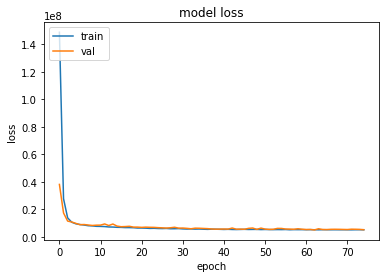

In [276]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

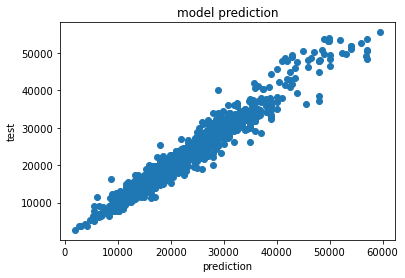

In [277]:
plt.title('model prediction')
plt.ylabel('test')
plt.xlabel('prediction')
plt.scatter(y_test,tahmindizisi)

# XGBOOST

In [317]:
xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

In [329]:
parameters = {
              'learning_rate': [.01, 0.03, .05], #so called `eta` value
              'max_depth': [5, 10, 15],
              'min_child_weight': [4, 6, 8],
              'subsample': [0.5,0.7,1],
              'colsample_bytree': [0.5,0.7,1],
              'n_estimators': [100,300,700,1000]}

In [330]:
xgboost_cv = GridSearchCV(xgb, parameters, cv = 3, n_jobs = -1, verbose = 2)

In [331]:
xgboost_cv.fit(x_train,y_train)

Fitting 3 folds for each of 972 candidates, totalling 2916 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None, colsample_bytree=1,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=0, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=0.08, max_bin=None,
                                    max_cat_to_on...
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None

In [332]:
best = xgboost_cv.best_params_
best

{'colsample_bytree': 0.5,
 'learning_rate': 0.03,
 'max_depth': 10,
 'min_child_weight': 4,
 'n_estimators': 700,
 'subsample': 0.7}

In [347]:
xgboost = XGBRegressor(objective='reg:squarederror',colsample_bytree = 0.5,
 learning_rate= 0.03,
 max_depth=10,
 min_child_weight= 4,
 n_estimators= 700,
 subsample= 0.7)
xgb_tuned =  xgboost.fit(x_train,y_train)

In [348]:
predictions = xgb_tuned.predict(x_test)

In [349]:
mae = mean_absolute_error(y_test,predictions)
print("MAE: {}".format(int(mae)))
mse = mean_squared_error(y_test,predictions)
print("MSE: {}".format(int(mse)))
mape = 100*mean_absolute_percentage_error(y_test,predictions)
print("MAPE: {}".format(mape))

MAE: 1351
MSE: 3721674
MAPE: 6.569151838398035


In [342]:
predicts_data = []
for i in range(len(x_test)):
    predicts_data.append([int(predictions[i]),
                                y_test[i], 
                                int(mean_absolute_error([y_test[i]],[predictions[i]])),
                                int(mean_squared_error([y_test[i]],[predictions[i]])),
                                round(100*mean_absolute_percentage_error([y_test[i]],[predictions[i]]),2)])

In [343]:
predicts_dataframe = pd.DataFrame(predicts_data,columns=["Test","Prediction", "MAE", "MSE", "MAPE"])
predicts_dataframe

,Test,Prediction,MAE,MSE,MAPE
0,22945,21490,1455,2118474,6.77
1,24003,21950,2053,4215963,9.35
2,18723,18350,373,139181,2.03
3,3417,2995,422,178461,14.11
4,12236,12500,263,69538,2.11
...,...,...,...,...,...
1052,8278,7783,495,245293,6.36
1053,17882,17888,5,31,0.03
1054,30663,29991,672,451636,2.24
1055,15733,15490,243,59482,1.57


In [344]:
predicts_dataframe.describe()

,Test,Prediction,MAE,MSE,MAPE
count,1057.000000,1057.000000,1057.000000,1.057000e+03,1057.000000
mean,22192.794702,22201.528855,1351.094607,3.721674e+06,6.569073
std,9598.637974,9625.158680,1377.203201,1.004753e+07,7.695294
min,2550.000000,1975.000000,0.000000,0.000000e+00,0.000000
25%,15464.000000,15441.000000,418.000000,1.750710e+05,2.160000
50%,20548.000000,20490.000000,985.000000,9.703130e+05,4.960000
75%,27279.000000,27549.000000,1811.000000,3.280470e+06,8.820000
max,57175.000000,59450.000000,13113.000000,1.719695e+08,128.090000


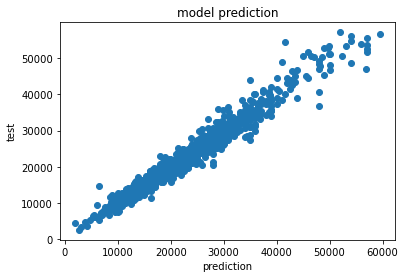

In [353]:
plt.title('model prediction')
plt.ylabel('test')
plt.xlabel('prediction')
plt.scatter(y_test,predictions)

## Save the model

In [45]:
model.save("AudiModel_Keras.h5")

In [46]:
joblib.dump(scaler, 'Audiscaler_Keras.json')

['Audiscaler_best_MAE.save']

In [351]:
xgb_tuned.save_model("AudiModel_XGBoost.json")